# Basic Regression in Python

To begin exploring machine learning, we start by doing basic regression in Python. The dataset we'll be using here is a small dataset for 7 houses currently on sale in San Jose, CA. 

**Output:**
- correlation coefficient r and the coefficients of the least squares regression line (a and b in y = ax + b). We'll use sq. ft (living) for the independent variable x and price as the dependent variable y.

## Phase 1: Reading & Cleaning Data

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [40]:
# read data from csv file

data = pd.read_csv('../data/external/housing-san-jose.csv')
data

,price,sq ft (living),sq ft (lot),bd,ba,year built,year renov,stories,rooms,Unnamed: 9,address
0,998888,1333,164,2,2.0,2008,2009.0,1,4.0,NaN,38 N Almaden Blvd UNIT 911
1,550000,852,4809,2,1.0,1930,NaN,1,NaN,NaN,"255 S 24th St,"
2,1200000,2316,5519,4,3.5,1901,2016.0,2,13.0,NaN,"755 E Saint James St,"
3,419000,645,1772,1,1.0,1990,NaN,1,NaN,NaN,2463 Jubilee Ln
4,2699000,2723,244807,4,3.0,1949,1949.0,1,9.0,NaN,11321 Canon Vista Ave
5,889000,1553,5000,4,3.0,1980,1980.0,1,7.0,NaN,1851 Pine Hollow Cir
6,675000,1008,5998,3,1.0,1954,NaN,1,NaN,NaN,3432 San Pablo Ave


In [44]:
''' Although we know we'll only be working with the first 2 columns in this dataset,
it's good practice to do some data cleaning so we'll begin with that'''
data.dtypes

price               int64
sq ft (living)      int64
sq ft (lot)         int64
bd                  int64
ba                  int64
year built          int64
year renov          int64
stories             int64
rooms               int64
Unnamed: 9        float64
address            object
dtype: object

In [45]:
# 1. convert 'year renov' and 'rooms', and 'ba' cols to int64 and fill NaNs with 0s
# 2. clean 'room' column
# 3. remove 'Unnamed 9' column
df = data
df[['year renov','rooms']] = df[['year renov','rooms']].fillna(0)
df[['year renov','rooms']] = df[['year renov','rooms']].astype(int)
df['ba'] = df['ba'].astype(int)
df = df.drop('Unnamed: 9',axis=1)
print(df.dtypes)
df

price              int64
sq ft (living)     int64
sq ft (lot)        int64
bd                 int64
ba                 int64
year built         int64
year renov         int64
stories            int64
rooms              int64
address           object
dtype: object


,price,sq ft (living),sq ft (lot),bd,ba,year built,year renov,stories,rooms,address
0,998888,1333,164,2,2,2008,2009,1,4,38 N Almaden Blvd UNIT 911
1,550000,852,4809,2,1,1930,0,1,0,"255 S 24th St,"
2,1200000,2316,5519,4,3,1901,2016,2,13,"755 E Saint James St,"
3,419000,645,1772,1,1,1990,0,1,0,2463 Jubilee Ln
4,2699000,2723,244807,4,3,1949,1949,1,9,11321 Canon Vista Ave
5,889000,1553,5000,4,3,1980,1980,1,7,1851 Pine Hollow Cir
6,675000,1008,5998,3,1,1954,0,1,0,3432 San Pablo Ave


In [59]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['price'].describe()

count         7.00
mean    1061555.43
std      770074.21
min      419000.00
25%      612500.00
50%      889000.00
75%     1099444.00
max     2699000.00
Name: price, dtype: float64

## Phase 2: Regression

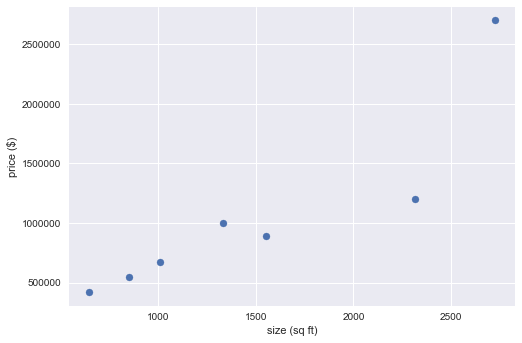

In [119]:
x,y = df['sq ft (living)'],df['price']
plt.scatter(x,y)
plt.xlabel('size (sq ft)')
plt.ylabel('price ($)')
plt.show() # there seems to be a linear correlation, which is to be expected

Coefficients:  [ 889.35025621]
intercept:  -263576.45318
R^2-score:  0.796832524441


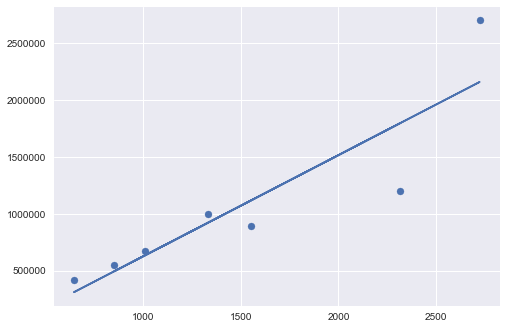

In [120]:
# sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = x.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(x, y)
y_preds = lm.predict(x)

# The coefficients
print('Coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)
# R-score
print('R^2-score: ', lm.score(x,y))
# The mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(x,y)
plt.plot(x,y_preds)
plt.show()

In [100]:
size = [480,630,750,1000,1333,1475,2500,2800]
x_test = pd.DataFrame({'x_test':size})
test_preds = pd.DataFrame({'size (x)': size, 'predicted price (y)': lm.predict(x_test.values.reshape(-1,1))})
test_preds

,predicted price (y),size (x)
0,163311.67,480
1,296714.21,630
2,403436.24,750
3,625773.80,1000
4,921927.44,1333
5,1048215.17,1475
6,1959799.19,2500
7,2226604.26,2800


**Notes:**
- Usually we'd split dataset into train and test group (usually 80:20), but because our data set is very small here I've then created a new test set and perform prediction on the values within that test set.
- Regression is a high bias and low-variance model, but this low variance characteristic is generally good when we have small sampling size.
- Q: Is this model overfitted or underfitted?

### Resources
- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
- http://people.duke.edu/~rnau/regintro.htm
- http://pareonline.net/getvn.asp?n=2&v=8
- https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
- https://matplotlib.org/users/pyplot_tutorial.html